In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Dsiplay all columns at once
pd.set_option("display.max_columns", None)

In [3]:
# Read the leads dataset
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Shape of dataset
df.shape   

(9240, 37)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 1: Exploratory Data Analysis

## 1.1 Fixing Invalid values
There are some categorical columns in which 'Select' is present. 

But **`Select`** value **indicates that person did not select any value** while filling the form, so this value should be *`treated as missing value`*

Replacing `Select` with NaN

In [6]:
# Replacing "Select" with NaN
df.replace('Select',np.NaN, inplace=True)

## 1.2 Missing Values

In [7]:
# Check for %age of missing values for each column
round((df.isna().sum() / df.shape[0]) * 100 , 2) 

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**Drop unnecessary column**
- Prospect ID : This column unique Id for Customer. Not required for analysis

In [8]:
# Drop unnecessary column
df.drop(columns = ['Prospect ID'], inplace = True)

**Drop columns having more than 40% missing**
- Lead Quality
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score
- How did you hear about X Education
- Lead Profile 

In [9]:
# Check for %age of missing values for each column
df.columns [ (round((df.isna().sum() / df.shape[0]) * 100 , 2) >= 40)]

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [10]:
# Drop columns having more than 40% records null
df.drop(columns = ['Lead Quality', 'Asymmetrique Activity Index','Asymmetrique Profile Index', 
                   'Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education',
                   'Lead Profile'], inplace = True)

**TotalVisits**

In [11]:
# Checking the distribution of column
df.TotalVisits.describe()       

# There is large gap between 75% and max, indicating presence of outliers.
# Better to impute missing values with median

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [12]:
# Impute missing values with median 
df.TotalVisits = df.TotalVisits.replace(np.NaN, df.TotalVisits.median())

**Page Views Per Visit**

In [13]:
df['Page Views Per Visit'].describe()   

# There is large gap between 75% and max, indicating presence of outliers.
# Better to impute missing values with median

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [14]:
# Impute missing values with median 
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.NaN, df['Page Views Per Visit'].median())

**Lead Source**

In [15]:
df['Lead Source'].value_counts(dropna=False)   # Checking the counts of various lvels

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [16]:
# Imputing missing values with mode 
df['Lead Source'] = df['Lead Source'].replace(np.NaN, df['Lead Source'].mode()[0])

**Last Activity**

In [17]:
df['Last Activity'].value_counts(dropna=False)   # Checking the counts of various lvels

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [18]:
# Imputing missing values with mode 
df['Last Activity'] = df['Last Activity'].replace(np.NaN, df['Last Activity'].mode()[0])

**Country**

In [19]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [20]:
# Replacing NaN values with mode of the column
df.Country = df.Country.replace(np.NaN, df.Country.mode()[0])

**Specialization**

In [21]:
df.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
# Since, majority of records have missing values. It is better to create 'Not Specified' category for missing records
df.Specialization.replace(np.NaN, 'Not Specified', inplace=True)

**What is your current occupation**

In [23]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
# Replacing NaN values with mode of the column
df['What is your current occupation'] = df['What is your current occupation'].replace(np.NaN, df['What is your current occupation'].mode()[0])

**What matters most to you in choosing a course**

In [25]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
# Replacing NaN values with mode of the column
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.NaN, df['What matters most to you in choosing a course'].mode()[0])

In [27]:
round((df.isna().sum() / df.shape[0]) * 100 , 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

**Tags**

In [28]:
df.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [29]:
# Since, majority of records have missing values. It is better to create 'Not Specified' category for missing records
df.Tags.replace(np.NaN, 'Not Specified', inplace=True)

**City**

In [30]:
df.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [31]:
# Missing value counts and Mumbai are almost similar in counts, so we can impute City with mode i.e 'Mumbai'
df.City.replace(np.NaN, df.City.mode()[0], inplace=True)

## 1.3 Duplicated rows

In [32]:
df.duplicated().sum()    # No duplicate rows

0

## 1.4 Target column analysis
Check if there is any **`imbalance`** 

**Converted (Dependent variable)**

In [33]:
df.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

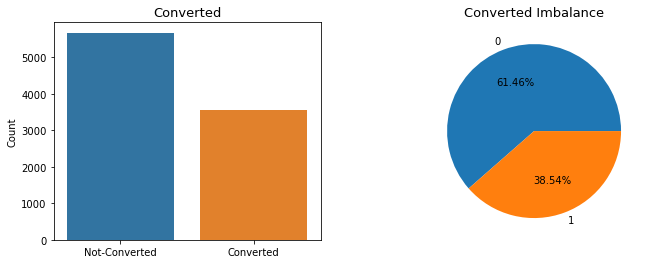

In [34]:
plt.figure(figsize=(11, 4))
plt.subplots_adjust(wspace = 0.3, hspace=0.8)

plt.subplot(1,2,1)
sns.countplot(df['Converted'])
plt.xlabel('')
plt.ylabel("Count")
plt.title('Converted',fontdict = {'fontsize': '13','fontweight': 5})
plt.xticks( [0,1], labels =['Not-Converted','Converted'] ,rotation = None)


plt.subplot(1,2,2)
df['Converted'].value_counts().plot.pie(autopct = "%1.2f%%")
plt.ylabel("")
plt.title('Converted Imbalance',fontdict = {'fontsize': '13','fontweight': 5})

plt.show() 

# As expected, the target column is IMBALANCED
# Only 39% of the leads get Converted and remaining 61% do not get converted 

## 1.5 Categorical column analysis

**Tags**

In [35]:
df.Tags.value_counts(dropna=False)

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [36]:
df.Tags.value_counts(dropna=False).index

Index(['Not Specified', 'Will revert after reading the email', 'Ringing',
       'Interested in other courses', 'Already a student',
       'Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS',
       'Not doing further education', 'Interested  in full time MBA',
       'Graduation in progress', 'invalid number',
       'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Still Thinking', 'Want to take admission but has financial problems',
       'In confusion whether part time or DLP', 'Interested in Next batch',
       'Lateral student', 'Shall take in the next coming month',
       'University not recognized', 'Recognition issue (DEC approval)'],
      dtype='object')

In [37]:
# Merging similar levels / levels with small frequencies
df['Tags'] = df['Tags'].replace(['Graduation in progress', 'invalid number','Diploma holder (Not Eligible)', 
                                 'wrong number given', 'opp hangup','number not provided', 'in touch with EINS', 
                                 'Lost to Others','Still Thinking', 'Want to take admission but has financial problems',
                                 'In confusion whether part time or DLP', 'Interested in Next batch',
                                 'Lateral student', 'Shall take in the next coming month','University not recognized', 
                                 'Recognition issue (DEC approval)','Not doing further education', 
                                 'Interested  in full time MBA'],'Others')

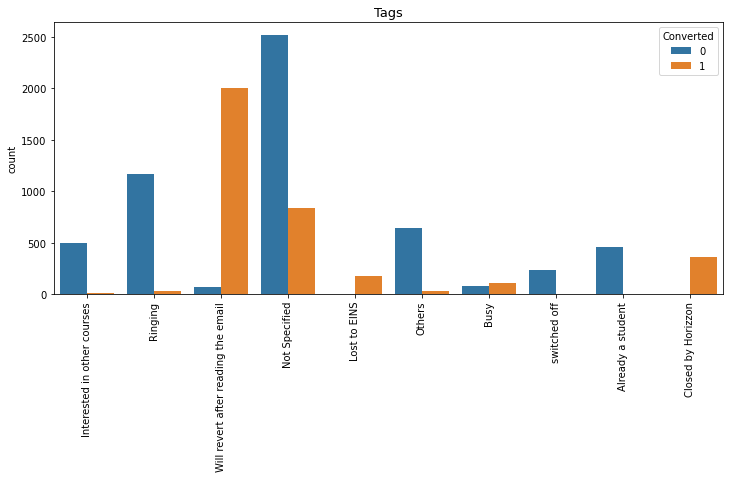

In [38]:
plt.figure(figsize=[12,5])
sns.countplot(df['Tags'], hue = df.Converted)
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Tags',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Majority of converted leads will revert after reading mail or have the tag 'Closed by horizzon'. 

**City**

In [39]:
df.City.value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

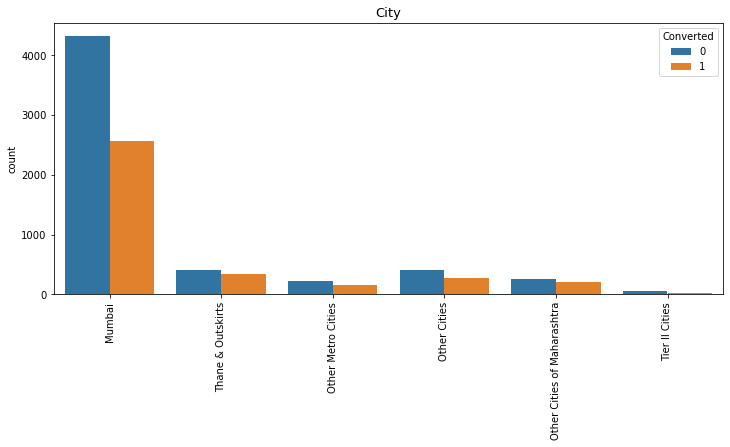

In [40]:
plt.figure(figsize=[12,5])
sns.countplot(df['City'], hue = df.Converted)
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('City',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [41]:
# 74.5% of records have Mumbai and rest all are very small frequencies

# Merging other frequencies to 'Not Mumbai' level
df.City.replace(['Thane & Outskirts', 'Other Cities',
       'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'],'Not Mumbai', inplace=True)

**Lead Source**

In [42]:
df['Lead Source'].value_counts(dropna=False)

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [43]:
# Merging similar levels /  levels with small frequencies

df['Lead Source'] = df['Lead Source'].replace({'Facebook':'Social Media', 'google':'Google'})
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call', 'Press_Release', 'Live Chat', 'youtubechannel', 'testone',
                                               'Pay per Click Ads', 'Social Media','welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'] ,'Others')

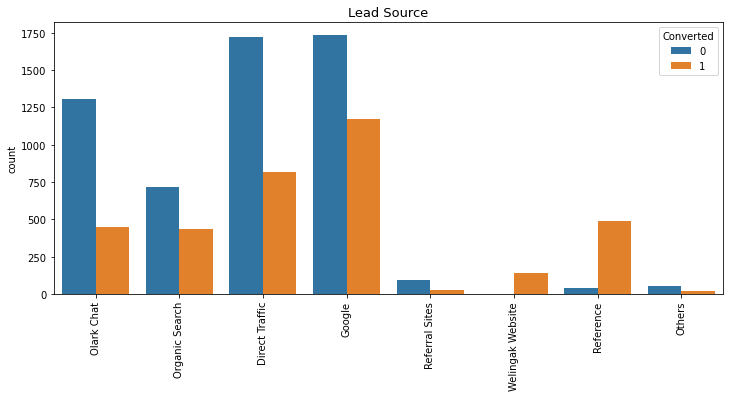

In [44]:
plt.figure(figsize=[12,5])
sns.countplot(df['Lead Source'], hue = df.Converted)
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Lead Source',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Majority of converted leads come from Google or Direct traffic. Few of them are also from Organic Search or Reference. 

**Last Notable Activity**

In [45]:
df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [46]:
# Last Notable Activity
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Bounced','Unsubscribed',
                                                                  'Email Marked Spam','Approached upfront',
                                                                   'Resubscribed to emails','View in browser link Clicked',
                                                                   'Form Submitted on Website','Email Received'],'Others')

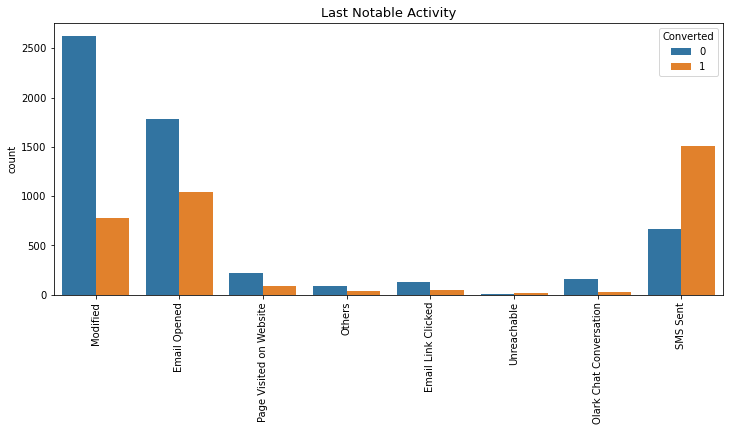

In [47]:
plt.figure(figsize=[12,5])
sns.countplot(df['Last Notable Activity'], hue = df.Converted)
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Last Notable Activity',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# The Last Notable Activity for Converted leads is either SMS Sent or Email Opened or Modified

**A free copy of Mastering The Interview**

In [48]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

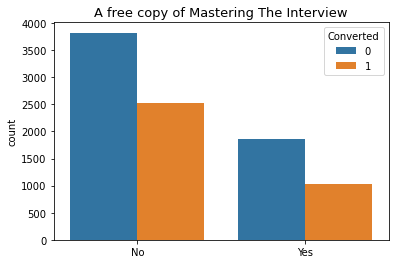

In [49]:
sns.countplot(df['A free copy of Mastering The Interview'], hue = df.Converted)
plt.xlabel('')
plt.title('A free copy of Mastering The Interview',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Overall most of the leads have not opted for a free copy for mastering the interview.
# More leads are converted for people who did not opt for free interview copy.

**Do Not Email**

In [50]:
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

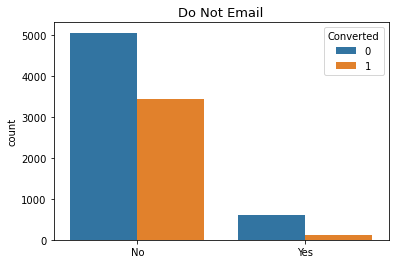

In [51]:
sns.countplot(df['Do Not Email'], hue = df.Converted)
plt.xlabel('')
plt.title('Do Not Email',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Mostly people want to receive emails and the potentially converted leads have opted for receiving emails

**What is your current occupation**

In [52]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

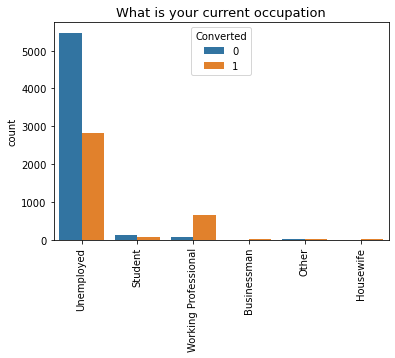

In [53]:
sns.countplot(df['What is your current occupation'], hue = df.Converted)
plt.xlabel('')
plt.xticks(rotation = 90)
plt.title('What is your current occupation',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Most of the converted leads come from 'Unemployed' occupation

In [54]:
# Other, Housewife and Businessman have very less frequency
# Combining them to form category 'Others'

df['What is your current occupation'] = df['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

**Country**

In [55]:
df.Country.value_counts(normalize=True).head()

# As observed, 96% of the records, have India as country. The percemtage of other countries is very less. 
# We can skip the Country column for our analysis

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
Name: Country, dtype: float64

In [56]:
df = df.drop('Country', axis = 1)

**Specialization**

In [57]:
df.Specialization.value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [58]:
# Combining Management fields together

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                     'Marketing Management','Operations Management',
                                                     'IT Projects Management','Supply Chain Management',
                                                     'Healthcare Management','Hospitality Management',
                                                     'Retail Management'] ,'Management_fields')  

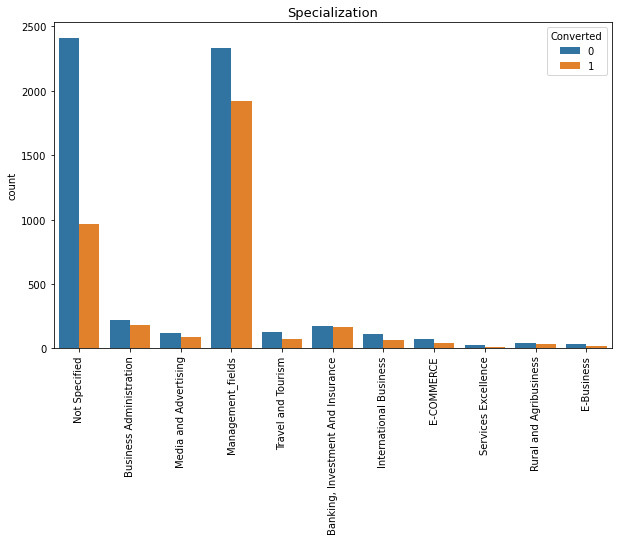

In [59]:
plt.figure(figsize=[10,6])
sns.countplot(df.Specialization, hue = df.Converted)
plt.xlabel('')
plt.xticks(rotation = 90)
plt.title('Specialization',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Maximum number of Converted leads belong to Management related fields.

**Last Activity**

In [60]:
df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [61]:
# There are many levels with very less frequencies. Combining these levels to create 'Others' level
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked',
                                                   'Approached upfront','Email Received','Email Marked Spam',
                                                   'Visited Booth in Tradeshow','Resubscribed to emails','Unreachable',
                                                   'Unsubscribed'],'Others')

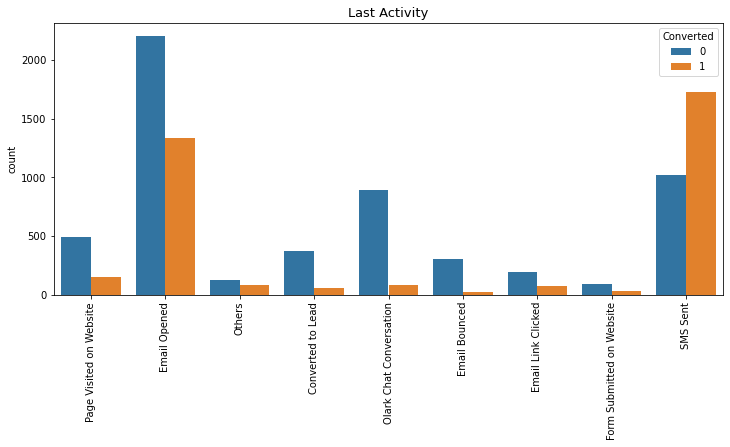

In [62]:
plt.figure(figsize=[12,5])
sns.countplot(df['Last Activity'], hue = df.Converted)
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Last Activity',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# The last activity for the Converted leads is SMS sent or Email opened.

**Lead Origin**

In [63]:
df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

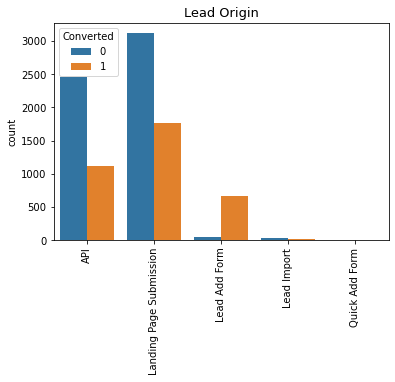

In [64]:
sns.countplot(df['Lead Origin'], hue = df.Converted)
plt.xlabel('')
plt.xticks(rotation = 90)
plt.title('Lead Origin',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Most of Converted leads came through 'Landing Page' or 'API'. Some leads came from 'Lead API Form' as well.

**Other columns**

In [65]:
# Check columns with only 1 level/ majority of records with 1 level

checkCols = ['What matters most to you in choosing a course', 'Newspaper Article','Digital Advertisement','Do Not Call',
             'Search','Get updates on DM Content','X Education Forums','Through Recommendations','Magazine',
             'Update me on Supply Chain Content','Receive More Updates About Our Courses','Newspaper',
             'I agree to pay the amount through cheque']

for i in checkCols:
    print(f"{i} \n\n {df[i].value_counts()} \n\n ---------------------------------\n")

What matters most to you in choosing a course 

 Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64 

 ---------------------------------

Newspaper Article 

 No     9238
Yes       2
Name: Newspaper Article, dtype: int64 

 ---------------------------------

Digital Advertisement 

 No     9236
Yes       4
Name: Digital Advertisement, dtype: int64 

 ---------------------------------

Do Not Call 

 No     9238
Yes       2
Name: Do Not Call, dtype: int64 

 ---------------------------------

Search 

 No     9226
Yes      14
Name: Search, dtype: int64 

 ---------------------------------

Get updates on DM Content 

 No    9240
Name: Get updates on DM Content, dtype: int64 

 ---------------------------------

X Education Forums 

 No     9239
Yes       1
Name: X Education Forums, dtype: int64 

 ---------------------------------

Through Recommendations 

 No     9233
Y

**Removal of columns (with only 1 level / majority of records with 1 level)**

- *Magazine, Receive More Updates About Our Courses* has all 'No' records making it irrelevant for analysis
- Similarly, columns like *Newspaper, Through Recommendations,Search, X Education Forums, Get updates on DM Content, Newspaper Article,Do Not Call, Digital Advertisement,I agree to pay the amount through cheque, What matters most to you in choosing a course, Update me on Supply Chain Content* have majority of records with one level.
Thus, these columns won't be useful for analysis

In [66]:
# Dropping unnecessary columns
df.drop(columns = ['Magazine', 'Through Recommendations','Receive More Updates About Our Courses','Newspaper', 'Search', 
                   'X Education Forums','Get updates on DM Content', 'Newspaper Article','Do Not Call', 'Digital Advertisement',
                   'I agree to pay the amount through cheque', 'What matters most to you in choosing a course', 
                    'Update me on Supply Chain Content'], inplace = True)

## 1.6  Numerical column analysis

In [67]:
df[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


### 1.6.1 Outlier Analysis

**TotalVisits**

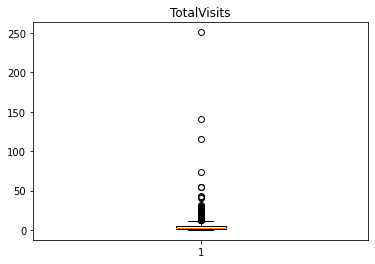

In [68]:
# TotalVisits
plt.boxplot(df['TotalVisits'])
plt.title('TotalVisits')
plt.show()

# Outliers are present. Need to handle the outliers

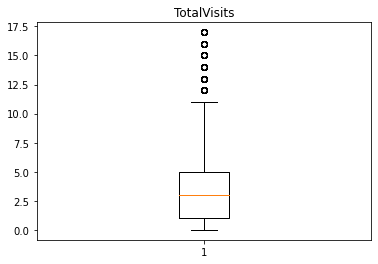

In [69]:
# Considering the records till 99th percentile
Q3 = df.TotalVisits.quantile(0.99)
df = df[df.TotalVisits <= Q3]

# Checking boxplot again
plt.boxplot(df['TotalVisits'])
plt.title('TotalVisits')
plt.show()

# Mostly the visits range from 0 to 11. Almost 50% of people visited the website 3 or less than 3 times.

**Total Time Spent on Website**

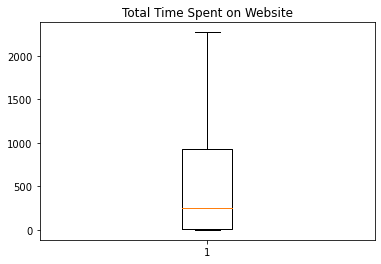

In [70]:
# Total Time Spent on Website
plt.boxplot(df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')
plt.show()

# No outlier handling is required for this column

**Page Views Per Visit**

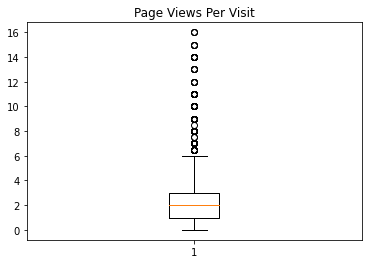

In [71]:
# Page Views Per Visit
plt.boxplot(df['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show()

# Outliers are present. Need to handle the outliers

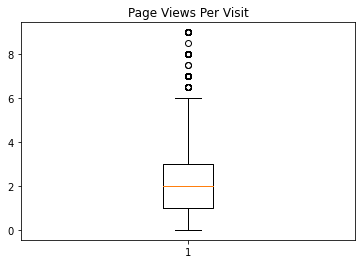

In [72]:
# Considering the records till 99th percentile
Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[ df['Page Views Per Visit'] <= Q3 ]

# Checking boxplot again
plt.boxplot(df['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show()

# Mostly the Page Views Per Visit range from 0 to 6. Almost 50% of people have page views of 2 or less than 2 

## 1.6.2 Boxplots 
With Target variable 'Converted'

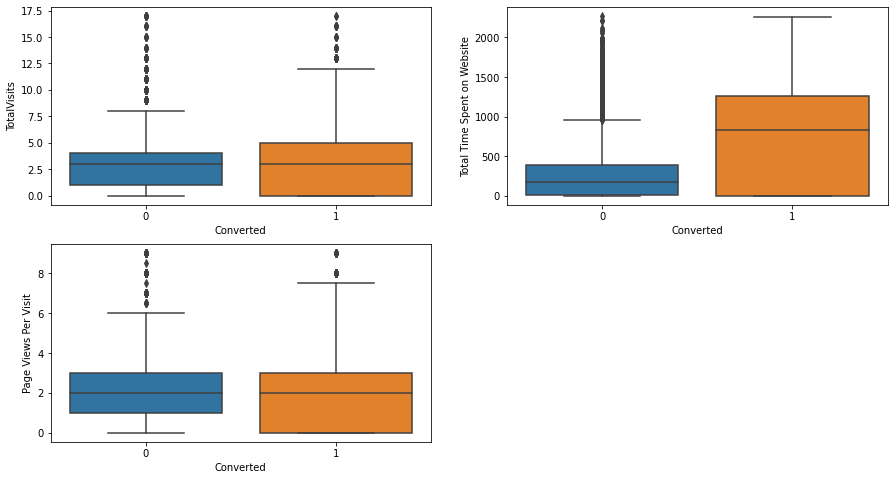

In [73]:
plt.figure(figsize=[15,8])

# TotalVisits
plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'Converted', y = 'TotalVisits')

# Total Time Spent on Website
plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'Converted', y = 'Total Time Spent on Website')

# Page Views Per Visit
plt.subplot(2,2,3)
sns.boxplot(data = df, x = 'Converted', y = 'Page Views Per Visit')

plt.show()

# With respect to 'Total Time Spent on Website', The Converted leads spent more time on the Website as compared to the non-converted leads
# With respect to 'TotalVisits' and 'Page Views Per Visit', the converted and non-converted leads behave in a similar manner

## 1.6.3 Pairplot

<Figure size 1080x1080 with 0 Axes>

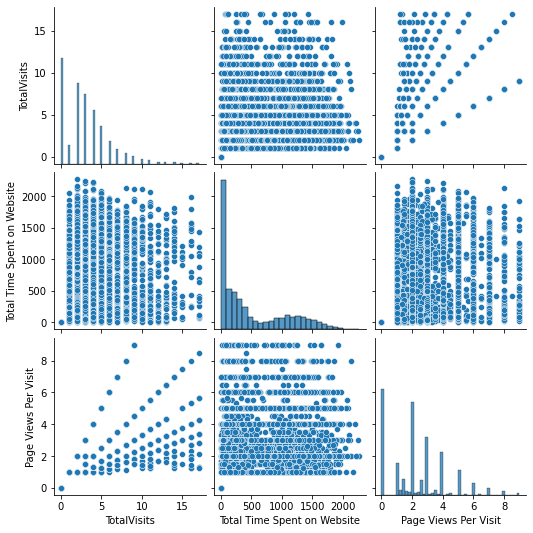

In [74]:
plt.figure(figsize=[15,15])
sns.pairplot( df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
plt.show()

# 'TotalVists' and 'Page Views Per Visit' have a positive linear trend.

# 1.6.4 Correlation Heatmap

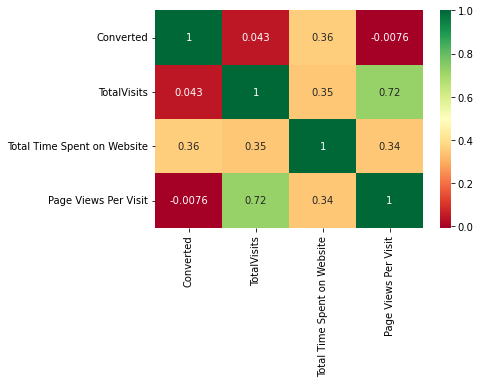

In [75]:
sns.heatmap(df[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), cmap = 'RdYlGn', annot = True)
plt.show()

# Converted has the max positive correlation with Total Time Spent on Website.
# Total visits and Page views per visit are highly correlated

# Step 2: Data Preparation

## 2.1 Binary Encoding
Mapping the Binary Yes/No variables to 1 and 0.

In [76]:
df['Do Not Email'] = df['Do Not Email'].map({'No':0,'Yes':1})
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})

In [77]:
df.Tags.value_counts()

Not Specified                          3304
Will revert after reading the email    2039
Ringing                                1176
Others                                  662
Interested in other courses             509
Already a student                       461
Closed by Horizzon                      347
switched off                            237
Busy                                    184
Lost to EINS                            171
Name: Tags, dtype: int64

## 2.2 Create Dummy variables

In [78]:
city_dummy = pd.get_dummies(df['City'] , prefix = 'City')
city_dummy

,City_Mumbai,City_Not Mumbai
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9235,1,0
9236,1,0
9237,1,0
9238,0,1


In [79]:
# Get dummies for categorical variables

# Tags
tag_dummy = pd.get_dummies(df['Tags'] , prefix = 'Tags')
tag_dummy.drop(columns = ['Tags_Others','Tags_Not Specified'], axis = 1, inplace=True)
df = pd.concat([df,tag_dummy], axis = 1)
df.drop(columns = 'Tags', inplace=True)

# City
city_dummy = pd.get_dummies(df['City'] , prefix = 'City')
city_dummy.drop(columns = ['City_Not Mumbai'], axis = 1, inplace=True)
df = pd.concat([df,city_dummy], axis = 1)
df.drop(columns = 'City', inplace=True)

# Last Activity
last_dummy = pd.get_dummies(df['Last Activity'] , prefix = 'Last Activity')
last_dummy.drop(columns = 'Last Activity_Others', axis = 1, inplace=True)
df = pd.concat([df,last_dummy], axis = 1)
df.drop(columns = 'Last Activity', inplace=True)

# Last Notable Activity
lna_dummy = pd.get_dummies(df['Last Notable Activity'] , prefix = 'Last Notable Activity')
lna_dummy.drop(columns = 'Last Notable Activity_Others', axis = 1, inplace=True)
df = pd.concat([df,lna_dummy], axis = 1)
df.drop(columns = 'Last Notable Activity', inplace=True)

# Lead Origin
leadOrigin_dummy = pd.get_dummies(df['Lead Origin'] , prefix = 'Lead Origin')
leadOrigin_dummy.drop(columns='Lead Origin_Lead Import', axis = 1, inplace= True)
df = pd.concat([df,leadOrigin_dummy], axis = 1)
df.drop(columns = 'Lead Origin', inplace=True)

# Specialization
special_dummy = pd.get_dummies(df['Specialization'] , prefix = 'Specialization')
special_dummy.drop(columns = 'Specialization_Not Specified', axis = 1, inplace=True)
df = pd.concat([df,special_dummy], axis = 1)
df.drop(columns = 'Specialization', inplace=True)

# What is your current occupation
occupation_dummy = pd.get_dummies(df['What is your current occupation'] , prefix = 'What is your current occupation')
occupation_dummy.drop(columns = 'What is your current occupation_Others', axis = 1, inplace=True)
df = pd.concat([df,occupation_dummy], axis = 1)
df.drop(columns = 'What is your current occupation', inplace=True)

# Lead Source
lead_source_dummy = pd.get_dummies(df['Lead Source'] , prefix = 'Lead Source')
lead_source_dummy.drop(columns = 'Lead Source_Others', axis = 1, inplace=True)
df = pd.concat([df,lead_source_dummy], axis = 1)
df.drop(columns = 'Lead Source', inplace=True)

In [80]:
df

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_fields,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,660737,0,0,0.0,0,0.00,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.50,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,660727,0,1,2.0,1532,2.00,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.00,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.00,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,1,8.0,1845,2.67,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
9236,579546,0,0,2.0,238,2.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
9237,579545,1,0,2.0,199,2.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
9238,579538,0,1,3.0,499,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


## 2.3 Train-Test Split

In [81]:
# Splitting original dataset into 70-30 ratio
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100, stratify=df['Converted'])

In [82]:
df_train.shape

(6363, 55)

In [83]:
df_test.shape

(2727, 55)

## 2.4 Rescaling the variables

In [84]:
# Need to scale numerical columns (excluding binary / dummy variables)
num_cols = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

# Using standarization for scaling
scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [85]:
df_train

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_fields,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
591,654179,0,0,-0.048272,-0.849425,-0.137745,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5447,608164,0,0,-0.746357,0.374673,-0.670602,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7204,594137,0,1,0.649812,2.433717,1.460826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2995,631121,0,0,1.347897,-0.748939,-0.457459,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1507,644264,0,0,0.649812,-0.314110,0.128684,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,603248,0,0,0.300770,-0.241030,-0.137745,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9089,580694,0,1,-1.095399,-0.884138,-1.203458,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4883,613149,1,0,-0.397315,-0.781826,-0.137745,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
5313,609068,0,1,2.045981,1.969656,0.395112,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## 2.5 Dividing into X and Y sets

In [86]:
# Dependent variable
y_train = df_train.pop('Converted')

# Independent variable
X_train = df_train.drop(columns='Lead Number')

# Step 3: Building the model
Since there are large number of predictors, I have used mixed approach.

`Beginning with `**`RFE`**` and later eliminating predictors one by one by checking p-value significance and VIF`

## 3.1 Recurrsive Feature Elimination (RFE)
**Get top 15 features**

In [87]:
# Creating model
lr = LogisticRegression()

# Using RFE to select top 15 features from the train set
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('A free copy of Mastering The Interview', False, 23),
 ('Tags_Already a student', True, 1),
 ('Tags_Busy', False, 4),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_switched off', True, 1),
 ('City_Mumbai', False, 30),
 ('Last Activity_Converted to Lead', False, 12),
 ('Last Activity_Email Bounced', False, 17),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Opened', False, 29),
 ('Last Activity_Form Submitted on Website', False, 33),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Notable Activity_Email Link Clicked', False, 3),
 ('Last Notable Activity_Em

In [89]:
# Columns selected by RFE
rfe_cols = X_train.columns[ rfe.support_]
rfe_cols

Index(['Do Not Email', 'Total Time Spent on Website', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website'],
      dtype='object')

In [90]:
# Using only RFE selected columns in training set
X_train_rfe = X_train[rfe_cols]

## 3.2 Building model using statsmodels
`X_train_rfe` is the train set with columns selected by RFE.

### Model 1

In [91]:
# Add constant to X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# Using GLM to create a model
model1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1268.9
Date:                Mon, 12 Sep 2022   Deviance:                       2537.8
Time:                        19:06:51   Pearson chi2:                 7.20e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8183      0.095    -19.180      0.000      -2.004      -1.632
Do Not Email                                     -0.9556      0.230     -4.155      0.000      -1.406      -0.505
Total Time Spent on Website                       1.0915      0.060     18.201      0.000       0.974       1.209
Tags_Already a student                           -2.9274      0.606     -4.834      0.000      -4.114      -1.740
Tags_Closed by Horizzon                           7.6747      1.021      7.520      0.000       5.674       9.675
Tags_Interested in other courses                 -1.9301      0.409     -4.718      0.000      -2.732      -1.128
Tags_Lost to EINS                                 6.0588      0.608      9.973      0.000       4.868       7.249
Tags_Ringing                                     -3.4512      0.250    -13.796      0.000      -3.942      -2.961
Tags_Will revert after reading the email          4.8110      0.190     25.313      0.000       4.439       5.184
Tags_switched off                                -3.3021      0.537     -6.152      0.000      -4.354      -2.250
Last Activity_SMS Sent                            2.1005      0.114     18.452      0.000       1.877       2.324
Last Notable Activity_Modified                   -1.7034      0.124    -13.781      0.000      -1.946      -1.461
Last Notable Activity_Olark Chat Conversation    -1.5927      0.420     -3.795      0.000      -2.415      -0.770
Lead Origin_Lead Add Form                         1.5617      0.358      4.361      0.000       0.860       2.264
Lead Source_Olark Chat                            1.3973      0.144      9.674      0.000       1.114       1.680
Lead Source_Welingak Website                      4.3374      0.814      5.330      0.000       2.743       5.932
=================================================================================================================
"""

P-values of all the variables are less than 0.05. Indicating **`all the features are significant`**

In [92]:
# Check for Multicollinearity 

# Checking VIF of all the predictors 
X = X_train_sm.drop('const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Origin_Lead Add Form,1.80
7,Tags_Will revert after reading the email,1.52
10,Last Notable Activity_Modified,1.48
9,Last Activity_SMS Sent,1.44
13,Lead Source_Olark Chat,1.43
1,Total Time Spent on Website,1.39
3,Tags_Closed by Horizzon,1.29
14,Lead Source_Welingak Website,1.29
4,Tags_Interested in other courses,1.11
0,Do Not Email,1.10


VIF for all the variables is less than 5 indicating there is very **less correlation between the predictor variables**

**All the variables are significant (p-value < 0.05) and have a very low VIF (<5)**.
We can proceed to determining cutoff values

### Cofficients of predictors and their signs 

In [93]:
# Creating a dataframe to store the cofficients of Predictors and their signs 

predictor_df = pd.DataFrame(model1.params.sort_values(ascending = False), columns=['Cofficient'])
predictor_df['Sign'] = predictor_df.Cofficient.apply(lambda x: '-' if str(x)[0] == '-' else '+')
predictor_df.Cofficient = np.abs(predictor_df.Cofficient)
predictor_df.sort_values(by='Cofficient', ascending = False, inplace=True)
predictor_df.drop('const', inplace=True)
predictor_df

,Cofficient,Sign
Tags_Closed by Horizzon,7.674683,+
Tags_Lost to EINS,6.058750,+
Tags_Will revert after reading the email,4.811041,+
Lead Source_Welingak Website,4.337418,+
Tags_Ringing,3.451202,-
Tags_switched off,3.302062,-
Tags_Already a student,2.927412,-
Last Activity_SMS Sent,2.100536,+
Tags_Interested in other courses,1.930141,-
Last Notable Activity_Modified,1.703421,-


- Tags_Closed by Horizzon, Tags_Lost to EINS, Tags_Will revert after reading the email have the max positive cofficient indicating they have a highly positive impact on converted
- Lead Source_Welingak Website, Tags_Ringing & Tags_switched off have negative impact on converted. 

### 3.2.1 Predict Prob (on train set)

In [94]:
# Predicting y_train_prob_pred values
y_train_prob_pred = model1.predict(X_train_sm)
y_train_prob_pred     # Probabilities that the lead will get converted

591     0.000371
5447    0.203806
7204    0.698085
2995    0.703093
1507    0.016443
          ...   
6073    0.110921
9089    0.271125
4883    0.004817
5313    0.990870
1772    0.010051
Length: 6363, dtype: float64

### 3.2.2 Taking `0.5` as default threshold

In [95]:
# Create a dataframe to store y_train, y_train_prob_pred, y_train_pred
threshold_df = pd.DataFrame(columns = ['y_train', 'y_train_prob_pred', 'y_train_pred'])
threshold_df['y_train'] = y_train
threshold_df['y_train_prob_pred'] = y_train_prob_pred

# Threshold 0.5
# If predicted prob > 0.5, lead is likely to be Converted 1  
threshold_df['y_train_pred'] = threshold_df['y_train_prob_pred'].apply(lambda x: 1 if x > 0.5 else 0)
threshold_df

,y_train,y_train_prob_pred,y_train_pred
591,0,0.000371,0
5447,0,0.203806,0
7204,1,0.698085,1
2995,0,0.703093,1
1507,0,0.016443,0
...,...,...,...
6073,0,0.110921,0
9089,1,0.271125,0
4883,0,0.004817,0
5313,1,0.990870,1


### 3.2.3 Calculating metrics

In [96]:
# Metrics

# Confusion Matrix

# Predicted     not_converted    converted
# Actual
# not_converted        TN       FP
# converted            FN       TP  

confusion = confusion_matrix(y_train, threshold_df.y_train_pred)
print("Confusion Matrix", confusion, sep = '\n')

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

# Accuracy
accuracy_score(y_train, threshold_df.y_train_pred)
print("Accuracy: " , round(accuracy_score(y_train, threshold_df.y_train_pred), 4) ) 

# Sensitivity
print("Sensitivity: " , round(recall_score(y_train, threshold_df.y_train_pred), 4) )

# Specificity
print("Specificity: " , round(TN / float(TN+FP), 4) )

# Precision
print("Precision: " , round(precision_score(y_train, threshold_df.y_train_pred), 4) )

# False Positive Rate
print("False Positive Rate: " , round (FP / float (TN+FP), 4) )

# Positive predictive rate 
print("False Positive Rate: " , round ( TP / float(TP+FP) , 4))

# Negative predictive rate 
print("Negative Positive Rate: " , round ( TN / float(TN+FN) , 4))

Confusion Matrix
[[3750  166]
 [ 311 2136]]
Accuracy:  0.925
Sensitivity:  0.8729
Specificity:  0.9576
Precision:  0.9279
False Positive Rate:  0.0424
False Positive Rate:  0.9279
Negative Positive Rate:  0.9234


### Which metric to focus on?

As per the problem statement, we want to identify potentially HOT leads, indicating 
1. We want to correctly predict 1s as 1s 
2. We also want to `reduce False Negatives` FN, i.e. We want to focus on **maximizing Sensitivity**

### 3.2.4 Plotting ROC Curve

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = roc_curve( y_train, y_train_prob_pred, drop_intermediate = False )

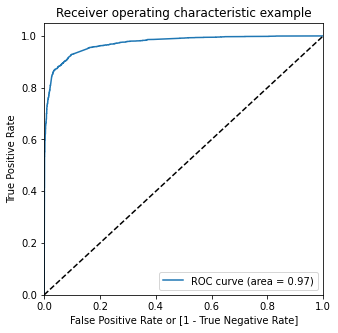

In [99]:
draw_roc(y_train, y_train_prob_pred)

# The avergae model (by considering 0.5 as cutoff) is very close to the ideal model as the curve is in first quadrant with very high AUC. 
# The AUC for this ROC curve is very high (near to ideal)

### 3.2.5 Find Optimal Threshold

In [100]:
# Cutoffs from 0 to 1
thresholds = [ i / 10 for i in range(0,11)] 
thresholds

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [101]:
# Preparing a table with predicted convertion 0/1 for different cutoffs
table1 = pd.DataFrame(columns=['y_train', 'y_train_prob_pred'] + thresholds)
table1.y_train = y_train
table1.y_train_prob_pred = y_train_prob_pred
for i in thresholds:
    table1[i] = table1.y_train_prob_pred.apply(lambda x: 1 if x > i else 0)
table1

,y_train,y_train_prob_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
591,0,0.000371,1,0,0,0,0,0,0,0,0,0,0
5447,0,0.203806,1,1,1,0,0,0,0,0,0,0,0
7204,1,0.698085,1,1,1,1,1,1,1,0,0,0,0
2995,0,0.703093,1,1,1,1,1,1,1,1,0,0,0
1507,0,0.016443,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,0,0.110921,1,1,0,0,0,0,0,0,0,0,0
9089,1,0.271125,1,1,1,0,0,0,0,0,0,0,0
4883,0,0.004817,1,0,0,0,0,0,0,0,0,0,0
5313,1,0.990870,1,1,1,1,1,1,1,1,1,1,0


In [102]:
# Preparing a table with measures like Accuracy, Precision, Sensitivity, Specificity for different cutoffs
table2 = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity'])
table2


for i in thresholds:
    conf = confusion_matrix(table1.y_train, table1[i])
    specificity = conf[0][0] / float(conf[0][0] + conf[0][1])
    accuracy = accuracy_score(table1.y_train, table1[i])
    precision = precision_score(table1.y_train, table1[i])
    recall = recall_score(table1.y_train, table1[i])
    table2.loc[i] = [i, accuracy, precision, recall, specificity]
    
    
table2

,Threshold,Accuracy,Precision,Sensitivity,Specificity
0.0,0.0,0.384567,0.384567,1.000000,0.000000
0.1,0.1,0.842527,0.719538,0.967716,0.764300
0.2,0.2,0.887003,0.795688,0.950143,0.847549
0.3,0.3,0.914349,0.871194,0.912137,0.915730
0.4,0.4,0.918906,0.894888,0.894156,0.934372
0.5,0.5,0.925035,0.927889,0.872906,0.957610
0.6,0.6,0.925664,0.944595,0.856968,0.968590
0.7,0.7,0.910420,0.958924,0.801389,0.978550
0.8,0.8,0.901462,0.966189,0.770740,0.983146
0.9,0.9,0.883545,0.980293,0.711483,0.991062


<AxesSubplot:xlabel='Threshold'>

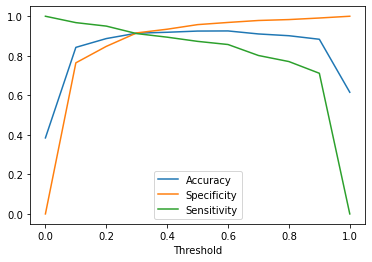

In [103]:
# Plot line graph to find optimal cutoff

table2.plot.line(x = 'Threshold', y = ['Accuracy', 'Specificity', 'Sensitivity'])

The Sensitivity, Specificity and Accuracy intersect around 0.3, more towards 0.2. Lets consider Optimal threshold as 0.265.

### 3.2.6 Taking Optimal Cutoff 0.265

**`Lead Score`** is assigned to each lead by multiplying the conversion probability for each lead with 100 

In [104]:
# Preparing a table with predicted convertion 0/1 for optimal cutoff 0.265 and assigning lead scores to each lead

lead_score_train_df = threshold_df[['y_train', 'y_train_prob_pred']]
lead_score_train_df['Lead Number'] = df_train['Lead Number']
lead_score_train_df['Converted_Predicted'] = lead_score_train_df.y_train_prob_pred.apply(lambda x: 1 if x > 0.265 else 0)

# Lead score
lead_score_train_df['Lead Score'] = lead_score_train_df.y_train_prob_pred.apply(lambda x: round(x * 100))

lead_score_train_df.reset_index(drop=True, inplace=True)
lead_score_train_df.rename(columns={'y_train': 'Converted_Actual', 
                                    'y_train_prob_pred': 'Predicted_Conversion_Prob'}, inplace=True)

lead_score_train_df[['Lead Number', 'Converted_Actual','Predicted_Conversion_Prob','Converted_Predicted','Lead Score']]

,Lead Number,Converted_Actual,Predicted_Conversion_Prob,Converted_Predicted,Lead Score
0,654179,0,0.000371,0,0
1,608164,0,0.203806,0,20
2,594137,1,0.698085,1,70
3,631121,0,0.703093,1,70
4,644264,0,0.016443,0,2
...,...,...,...,...,...
6358,603248,0,0.110921,0,11
6359,580694,1,0.271125,1,27
6360,613149,0,0.004817,0,0
6361,609068,1,0.990870,1,99


### 3.2.7 Calculating metrics `(on train set)`

In [105]:
# Metrics

# Confusion metrix
confusion = confusion_matrix(y_train, lead_score_train_df['Converted_Predicted'])
print("Confusion Matrix", confusion, sep = '\n')
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

# Accuracy
print("Accuracy: " , round(accuracy_score(y_train, lead_score_train_df['Converted_Predicted']), 4) ) 

# Sensitivity
print("Sensitivity: " , round(recall_score(y_train, lead_score_train_df['Converted_Predicted']), 4) )

# Specificity
print("Specificity: " , round( TN / float(TN+FP),4) ) 

# Precision
print("Precision: ", round(precision_score(y_train, lead_score_train_df['Converted_Predicted']), 4) )

# False Positive Rate
print("False Positive Rate: " , round (FP / float (TN+FP), 4) )

# Positive predictive rate 
print("Positive Predictive Rate: " , round ( TP / float(TP+FP) , 4))

# Negative predictive rate 
print("Negative Positive Rate: " , round ( TN / float(TN+FN) , 4))

Confusion Matrix
[[3554  362]
 [ 192 2255]]
Accuracy:  0.9129
Sensitivity:  0.9215
Specificity:  0.9076
Precision:  0.8617
False Positive Rate:  0.0924
Positive Predictive Rate:  0.8617
Negative Positive Rate:  0.9487


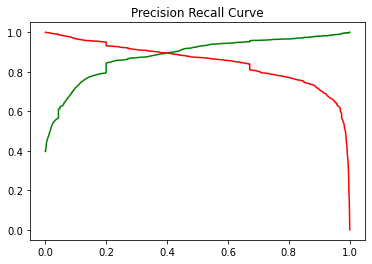

In [106]:
# Precision Recall Curve
p, r, thresholds = precision_recall_curve(y_train, lead_score_train_df['Predicted_Conversion_Prob'])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve')
plt.show()

### Visualizing the predictor variables wrt to Converted

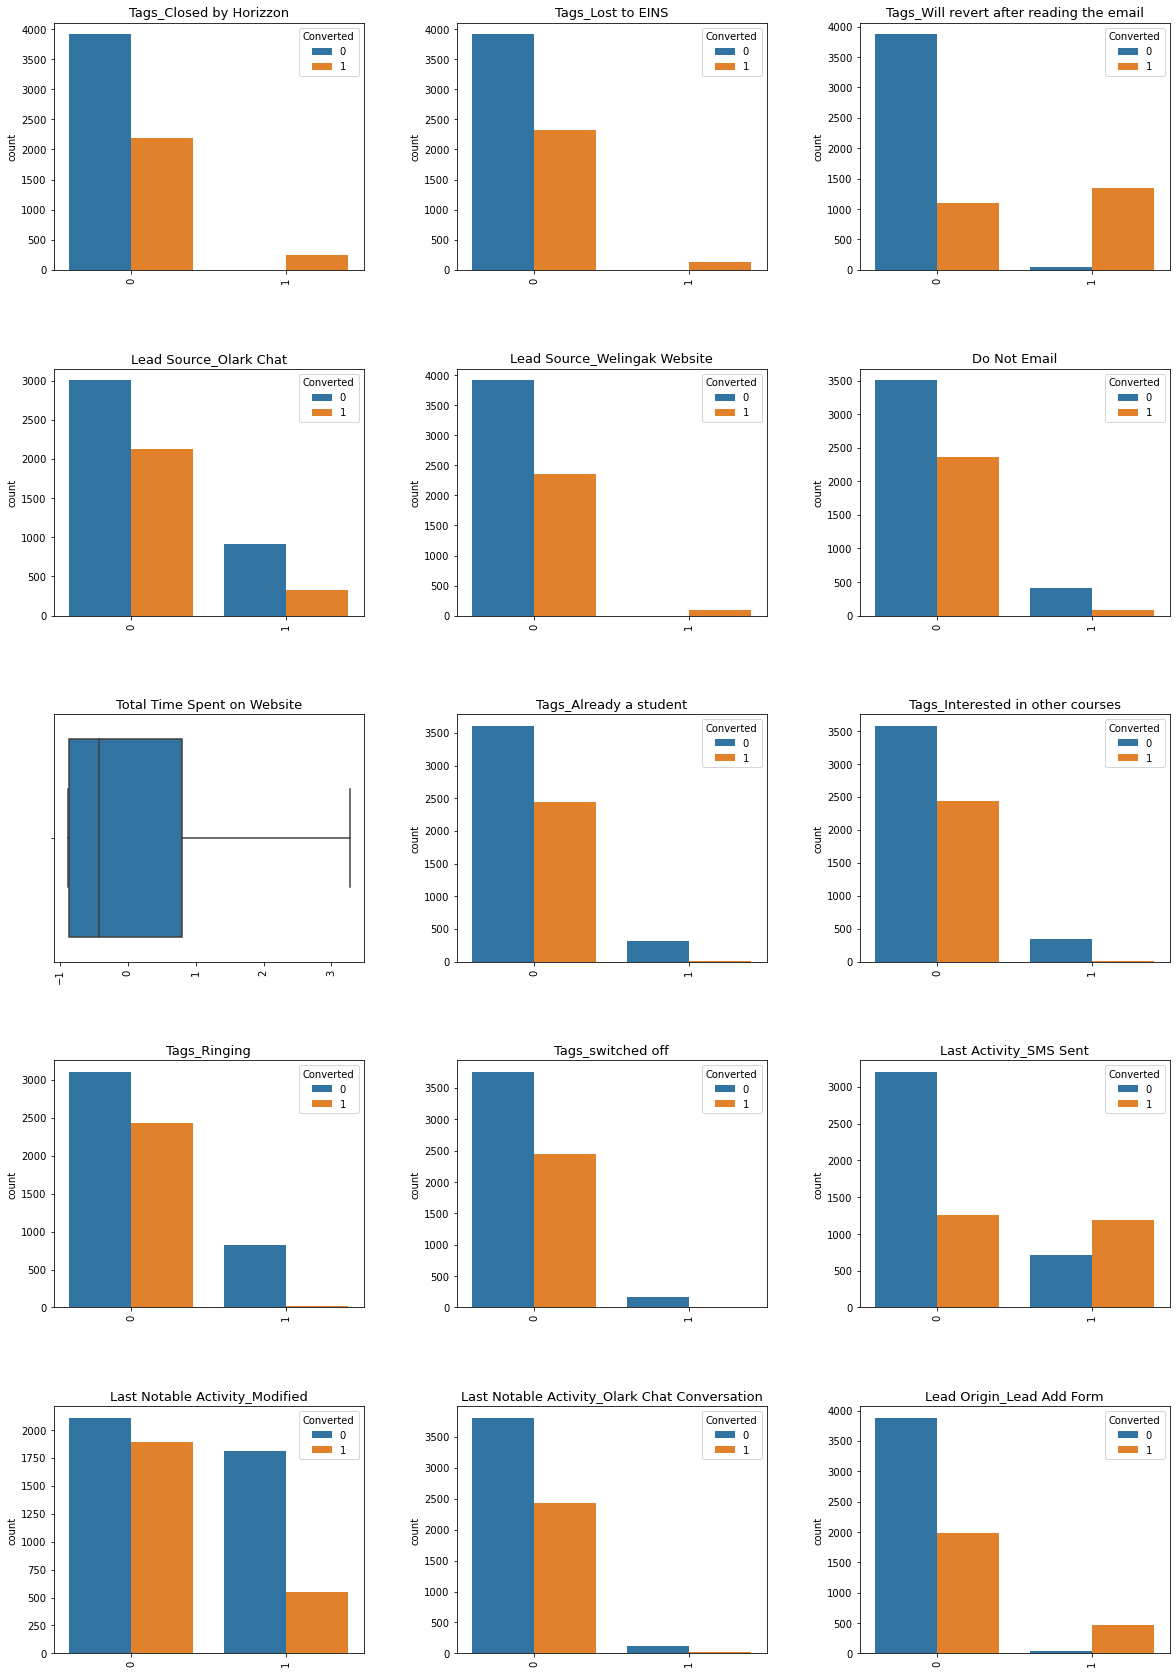

In [107]:
X = X_train_sm.drop('const', axis = 1)
X = pd.concat([X, y_train], axis = 1)
cols = ['Tags_Closed by Horizzon','Tags_Lost to EINS','Tags_Will revert after reading the email', 'Lead Source_Olark Chat','Lead Source_Welingak Website','Do Not Email', 'Total Time Spent on Website', 'Tags_Already a student','Tags_Interested in other courses','Tags_Ringing', 'Tags_switched off','Last Activity_SMS Sent', 'Last Notable Activity_Modified','Last Notable Activity_Olark Chat Conversation','Lead Origin_Lead Add Form']


plt.figure(figsize=(20, 30))
plt.subplots_adjust(wspace = 0.3, hspace=0.4)
for index,i in enumerate(cols):
    plt.subplot(5,3,index+1)
    if i == 'Total Time Spent on Website':
        sns.boxplot(data = X, x = i, hue = 'Converted')
    else:
        sns.countplot(X[i], hue = X['Converted'])
    plt.xlabel('')
    plt.xticks(rotation = 90)
    plt.title(i,fontdict = {'fontsize': '13','fontweight': 5})

# Step 4: Making predictions on the test set

## 4.1 Rescaling the test set

In [108]:
# Need to scale numerical columns (excluding binary / dummy variables)
num_cols = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

# Fit the scaler on test set
df_test[num_cols] = scaler.transform(df_test[num_cols])

## 4.2 Dividing into X and Y sets

In [109]:
# Dependent variable
y_test = df_test.pop('Converted')

# Independent variable
X_test = df_test.drop(columns=['Lead Number'])

In [110]:
# Using only RFE selected columns in training set
X_test_rfe = X_test[rfe_cols]

## 4.3 Predict Prob 

In [111]:
X_test_sm = sm.add_constant(X_test_rfe) 

# Predicting probability that the lead will get converted
y_test_prob = model1.predict(X_test_sm)
y_test_prob

2358    0.948016
1562    0.979686
6204    0.971714
7952    0.995530
3308    0.072024
          ...   
8549    0.072828
6438    0.973128
2090    0.984904
7085    0.972004
3220    0.792054
Length: 2727, dtype: float64

## 4.4 Taking cutoff as 0.265

**`Lead Score`** is assigned to each lead by multiplying the conversion probability for each lead with 100 

In [112]:
test_lead_df = pd.DataFrame(columns=['Actual_Converted','Predicted_Conversion_prob','Predicted_Converted', 'Lead Number','Lead Score'])
test_lead_df.Actual_Converted = y_test
test_lead_df.Predicted_Conversion_prob = y_test_prob
test_lead_df.Predicted_Converted = test_lead_df.Predicted_Conversion_prob.apply(lambda x: 1 if x > 0.265 else 0)
test_lead_df['Lead Number'] = df_test['Lead Number']
test_lead_df['Lead Score'] = test_lead_df.Predicted_Conversion_prob.apply(lambda x: round(x * 100))
test_lead_df.reset_index(drop=True, inplace=True)
test_lead_df = test_lead_df[['Lead Number', 'Actual_Converted','Predicted_Conversion_prob','Predicted_Converted','Lead Score']]
test_lead_df

,Lead Number,Actual_Converted,Predicted_Conversion_prob,Predicted_Converted,Lead Score
0,637039,1,0.948016,1,95
1,643930,1,0.979686,1,98
2,602214,1,0.971714,1,97
3,588850,1,0.995530,1,100
4,628411,0,0.072024,0,7
...,...,...,...,...,...
2722,584471,0,0.072828,0,7
2723,600612,1,0.973128,1,97
2724,639471,1,0.984904,1,98
2725,595214,1,0.972004,1,97


## 4.5 Calculating metrics `(on test set)`

In [113]:
# Metrics

# Confusion metrix
confusion = confusion_matrix(y_test, test_lead_df.Predicted_Converted)
print("Confusion Matrix", confusion, sep = '\n')
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

# Accuracy
print("Accuracy: " , round(accuracy_score(y_test, test_lead_df.Predicted_Converted), 4) ) 

# Sensitivity
print("Sensitivity: " , round(recall_score(y_test, test_lead_df.Predicted_Converted), 4) )

# Specificity
print("Specificity: " , round( TN / float(TN+FP),4) ) 

# Precision
print("Precision: ", round(precision_score(y_test, test_lead_df.Predicted_Converted), 4) )

# False Positive Rate
print("False Positive Rate: " , round (FP / float (TN+FP), 4) )

# Positive predictive rate 
print("Positive Predictive Rate: " , round ( TP / float(TP+FP) , 4))

# Negative predictive rate 
print("Negative Positive Rate: " , round ( TN / float(TN+FN) , 4))

Confusion Matrix
[[1535  144]
 [  85  963]]
Accuracy:  0.916
Sensitivity:  0.9189
Specificity:  0.9142
Precision:  0.8699
False Positive Rate:  0.0858
Positive Predictive Rate:  0.8699
Negative Positive Rate:  0.9475


### Aggressive Lead Conversion

In [114]:
# Company can target and call all the customers that have a lead score > 30
test_lead_df [ test_lead_df['Lead Score'] > 30]

,Lead Number,Actual_Converted,Predicted_Conversion_prob,Predicted_Converted,Lead Score
0,637039,1,0.948016,1,95
1,643930,1,0.979686,1,98
2,602214,1,0.971714,1,97
3,588850,1,0.995530,1,100
6,657247,1,0.970326,1,97
...,...,...,...,...,...
2721,605341,1,0.997812,1,100
2723,600612,1,0.973128,1,97
2724,639471,1,0.984904,1,98
2725,595214,1,0.972004,1,97


### Company want to focus on other tasks `(Minimize the calls)`


In [115]:
# Company can target only the customers that have a lead score > 70
test_lead_df [ test_lead_df['Lead Score'] > 70]

,Lead Number,Actual_Converted,Predicted_Conversion_prob,Predicted_Converted,Lead Score
0,637039,1,0.948016,1,95
1,643930,1,0.979686,1,98
2,602214,1,0.971714,1,97
3,588850,1,0.995530,1,100
6,657247,1,0.970326,1,97
...,...,...,...,...,...
2721,605341,1,0.997812,1,100
2723,600612,1,0.973128,1,97
2724,639471,1,0.984904,1,98
2725,595214,1,0.972004,1,97


## Conclusions
The features that matter the most wrt to lead conversion are:

**Focus on leads with:**
- When current status of lead (tag) was:Closed by Horizzon, Lost to EINS, Will revert after reading the mail
- When the lead source was Welingak website or Olark chat
- When the lead origin is Lead add form.
- When the last activity was SMS Sent
- Total time spent on the website.

**Do not focus on leads with:**
- When current status of lead (tag) was: Switched off, Ringing, Already a student
- When current status of lead (tag) was Interested in other courses
- When last notable activity was: Olark chat conversation, Activity Modified

Keeping these in mind the X Education can flourish as they have a very high chance to convince the potential leads to buy their courses and thus increase the lead conversion rate with minimized calls.